In [1]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab            # The functions in this package can add the fitting curve of the random variable distribution
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
import scipy
import scipy.cluster.hierarchy as sch
from scipy.stats import norm
from scipy.stats import bartlett

#from scipy.cluster.hierarchy import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from functions import *
import math 
#plt.style.use('fivethirtyeight')
#%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [2]:
glo_warm = pd.read_csv("temperature.csv")
glo_warm.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1961,1961,?C,-0.12,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1962,1962,?C,-0.17,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1963,1963,?C,0.84,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1964,1964,?C,-0.78,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1965,1965,?C,-0.25,Fc,Calculated data


In [3]:
glo_warm = glo_warm[['Year','Area', 'Value']]
glo_warm = glo_warm.rename(columns={'Area':'Country', 'Value':'Temperature_change'})
glo_warm['Year'] = pd.to_datetime(glo_warm['Year'], format='%Y')
glo_warm.head()

,Year,Country,Temperature_change
0,1961-01-01,Afghanistan,-0.12
1,1962-01-01,Afghanistan,-0.17
2,1963-01-01,Afghanistan,0.84
3,1964-01-01,Afghanistan,-0.78
4,1965-01-01,Afghanistan,-0.25


In [4]:
glo_warm.dtypes

Year                  datetime64[ns]
Country                       object
Temperature_change           float64
dtype: object

In [5]:
glo_warm.isnull().sum()

Year                    0
Country                 0
Temperature_change    481
dtype: int64

In [6]:
glo_warm= glo_warm.fillna(glo_warm['Temperature_change'].mean())
glo_warm.head()

,Year,Country,Temperature_change
0,1961-01-01,Afghanistan,-0.12
1,1962-01-01,Afghanistan,-0.17
2,1963-01-01,Afghanistan,0.84
3,1964-01-01,Afghanistan,-0.78
4,1965-01-01,Afghanistan,-0.25


In [7]:
deforest = pd.read_csv("annual-deforestation.csv", encoding='latin')
deforest.head(5)

,Entity,Code,Year,Deforestation
0,Africa,NaN,1990,4096000.00
1,Africa,NaN,2000,4314000.00
2,Africa,NaN,2010,4444000.00
3,Africa,NaN,2015,4414000.00
4,Algeria,DZA,1990,14800.00


In [8]:
deforest['Year'] = pd.to_datetime(deforest['Year'], format='%Y' )
deforest = deforest.rename(columns={'Entity':'Country'})
deforest = deforest[['Year', 'Country', 'Deforestation']]
deforest.sort_values(by="Year", ascending=True).head(5)

,Year,Country,Deforestation
0,1990-01-01,Africa,4096000.00
248,1990-01-01,Madagascar,70500.00
116,1990-01-01,Djibouti,0.00
249,1990-01-01,Malawi,42000.00
253,1990-01-01,Maldives,0.00


In [9]:
deforest[(deforest['Country']=='World')]

,Year,Country,Deforestation
484,1990-01-01,World,15818000.00
485,2000-01-01,World,15117000.00
486,2010-01-01,World,11801000.00
487,2015-01-01,World,10150000.00


In [10]:
North_America = deforest[(deforest['Country']=='United States')|(deforest['Country']=='Canada')|(deforest['Country']=='Mexico')|(deforest['Country']=='Alaska')]
North_America =  North_America.groupby(by='Year').sum()   
North_America

,Deforestation
Year,
1990-01-01,740230.00
2000-01-01,475300.00
2010-01-01,252910.00
2015-01-01,203340.00


In [11]:
America = deforest[(deforest['Country']=='United States')]
#deforest[deforest['Country']]
#deforest=deforest.append({ 'Year' : '1990-01-01', 'Country' : 'North America' ,'Deforestation' : 'Yes'} , ignore_index=True)


In [12]:
deforest[(deforest['Country']=='Asia')|(deforest['Country']=='Europe')|(deforest['Country']=='Africa')|(deforest['Country']=='Oceania')|(deforest['Country']=='South America')|(deforest['Country']=='United States')|(deforest['Country']=='Canada')|(deforest['Country']=='Mexico')]

,Year,Country,Deforestation
0,1990-01-01,Africa,4096000.00
1,2000-01-01,Africa,4314000.00
2,2010-01-01,Africa,4444000.00
3,2015-01-01,Africa,4414000.00
16,1990-01-01,Asia,4170000.00
17,2000-01-01,Asia,2684000.00
18,2010-01-01,Asia,2925000.00
19,2015-01-01,Asia,2235000.00
70,1990-01-01,Canada,54420.00
71,2000-01-01,Canada,50450.00


In [13]:
deforest[deforest['Deforestation']<=250000].sort_values(by='Deforestation', ascending=False)

,Year,Country,Deforestation
53,2015-01-01,Bolivia,242540.00
10,2010-01-01,Argentina,242400.00
93,1990-01-01,Colombia,229130.00
298,1990-01-01,Mozambique,219000.00
94,2000-01-01,Colombia,214330.00
...,...,...,...
286,2010-01-01,Monaco,0.00
287,2015-01-01,Monaco,0.00
297,2015-01-01,Morocco,0.00
306,1990-01-01,Nauru,0.00


In [14]:
deforest.isnull().sum()

Year             0
Country          0
Deforestation    0
dtype: int64

In [15]:
emission = pd.read_csv('emission_gaz.csv') 
#emission = emission[['Area', 'Element', 'Item', 'Year', 'Value', 'Unit']]
emission.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,2,Afghanistan,7225,Emissions (CH4),1707,LULUCF,1990,1990,3050,FAO TIER 1,kilotonnes,0.01,Fc,Calculated data,NaN
1,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1707,LULUCF,1990,1990,3050,FAO TIER 1,kilotonnes,0.00,Fc,Calculated data,NaN
2,GT,Emissions Totals,2,Afghanistan,7273,Emissions (CO2),1707,LULUCF,1990,1990,3050,FAO TIER 1,kilotonnes,-2388.80,Fc,Calculated data,NaN
3,GT,Emissions Totals,2,Afghanistan,7225,Emissions (CH4),1707,LULUCF,1991,1991,3050,FAO TIER 1,kilotonnes,0.01,Fc,Calculated data,NaN
4,GT,Emissions Totals,2,Afghanistan,7230,Emissions (N2O),1707,LULUCF,1991,1991,3050,FAO TIER 1,kilotonnes,0.00,Fc,Calculated data,NaN


In [16]:
emission = pd.pivot_table(emission, values='Value', index=['Area', 'Year', 'Unit'], columns='Element', aggfunc=np.sum)
emission = emission.reset_index()
#emission = emission[['Area','Year', 'Element', 'Unit', 'Forest fires']]
emission = emission.rename(columns={'Area':'Country', 'Emissions (CH4)':'CH4','Emissions (CO2)':'CO2','Emissions (N2O)':'N2O'})

emission['Year']=pd.to_datetime(emission['Year'], format='%Y')
emission.head()

Element,Country,Year,Unit,CH4,CO2,N2O
0,Afghanistan,1990-01-01,kilotonnes,0.01,-2388.80,0.00
1,Afghanistan,1991-01-01,kilotonnes,0.01,-2388.80,0.00
2,Afghanistan,1992-01-01,kilotonnes,0.01,-2388.80,0.00
3,Afghanistan,1993-01-01,kilotonnes,0.01,-2388.80,0.00
4,Afghanistan,1994-01-01,kilotonnes,0.01,-2388.80,0.00


In [17]:
df = deforest.merge(emission, on=['Year', 'Country'], how='left').merge(glo_warm, on=['Year', 'Country'], how='left')
df = df.set_index('Year')
df.groupby([pd.Grouper(freq='Y'), 'Country']).mean()

Deforestation     CH4       CO2    N2O  \
Year       Country                                             
1990-12-31 Africa        4096000.00 2308.10 964077.37 168.12   
           Algeria         14800.00    1.76    573.79   0.13   
           Argentina      213600.00   26.66  44315.78   1.23   
           Aruba               0.00    0.00      0.00   0.00   
           Asia          4170000.00 3265.33 207566.48  45.60   
...                             ...     ...       ...    ...   
2015-12-31 Venezuela      108290.00     NaN       NaN    NaN   
           Vietnam          1590.00     NaN       NaN    NaN   
           World        10150000.00     NaN       NaN    NaN   
           Zambia         189710.00  433.64  32840.42  39.59   
           Zimbabwe        46070.00    5.50  11318.97   0.50   

                      Temperature_change  
Year       Country                        
1990-12-31 Africa                    NaN  
           Algeria                  1.31  
           Argentina                0.39  
           Aruba                    0.15  
           Asia                      NaN  
...                                  ...  
2015-12-31 Venezuela                 NaN  
           Vietnam                   NaN  
           World                     NaN  
           Zambia                   1.86  
           Zimbabwe                 1.23  

[495 rows x 5 columns]

In [18]:
df.isnull().sum()

Country                0
Deforestation          0
Unit                  57
CH4                   69
CO2                   57
N2O                   69
Temperature_change    73
dtype: int64

In [19]:
df = df.dropna()
df = df.reset_index()
df = df.replace(0, df.mean())

df

<ipython-input-19-2954216a15a1>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.replace(0, df.mean())


,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
0,1990-01-01,Algeria,14800.00,kilotonnes,1.76,573.79,0.13,1.31
1,2000-01-01,Algeria,14500.00,kilotonnes,9.63,573.79,0.53,0.86
2,2010-01-01,Algeria,1400.00,kilotonnes,0.18,-2405.50,0.02,2.29
3,2015-01-01,Algeria,5400.00,kilotonnes,0.07,-625.42,0.01,1.15
4,1990-01-01,Argentina,213600.00,kilotonnes,26.66,44315.78,1.23,0.39
...,...,...,...,...,...,...,...,...
405,2015-01-01,Zambia,189710.00,kilotonnes,433.64,32840.42,39.59,1.86
406,1990-01-01,Zimbabwe,46070.00,kilotonnes,4.39,10401.52,0.30,0.52
407,2000-01-01,Zimbabwe,46070.00,kilotonnes,0.55,10401.52,0.02,-0.29
408,2010-01-01,Zimbabwe,46070.00,kilotonnes,5.43,10940.25,0.50,1.07


In [20]:
df.head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
0,1990-01-01,Algeria,14800.00,kilotonnes,1.76,573.79,0.13,1.31
1,2000-01-01,Algeria,14500.00,kilotonnes,9.63,573.79,0.53,0.86
2,2010-01-01,Algeria,1400.00,kilotonnes,0.18,-2405.50,0.02,2.29
3,2015-01-01,Algeria,5400.00,kilotonnes,0.07,-625.42,0.01,1.15
4,1990-01-01,Argentina,213600.00,kilotonnes,26.66,44315.78,1.23,0.39


In [21]:
nations = df.groupby(by='Country').mean().reset_index()
nations

,Country,Deforestation,CH4,CO2,N2O,Temperature_change
0,Algeria,9025.00,2.91,-470.83,0.17,1.40
1,Argentina,229550.00,25.61,62261.59,1.11,0.28
2,Aruba,91337.05,39.38,-0.04,1.40,0.70
3,Australia,558446.67,62.71,43383.50,3.60,0.42
4,Austria,5712.50,19.70,-10044.28,0.70,1.48
...,...,...,...,...,...,...
109,Ukraine,510.00,2.66,-29181.15,0.24,1.72
110,Uruguay,1245.00,0.30,-11602.44,0.02,0.37
111,Uzbekistan,6730.00,26.74,-5174.20,0.96,1.52
112,Zambia,138546.67,306.46,22562.86,25.30,1.14


In [22]:

world = df.groupby(by='Year').mean()
world

,Deforestation,CH4,CO2,N2O,Temperature_change
Year,,,,,
1990-01-01,151797.48,55.20,22316.74,1.72,0.58
2000-01-01,127120.55,29.75,16100.90,0.94,0.70
2010-01-01,82066.50,35.89,13397.26,2.39,1.07
2015-01-01,83448.39,82.87,9818.43,2.19,1.31


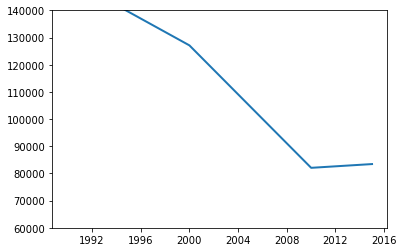

In [23]:
# plot
fig, ax = plt.subplots()

ax.plot(world['Deforestation'], linewidth=2.0)

ax.set(ylim=(60000, 140000))

plt.show()


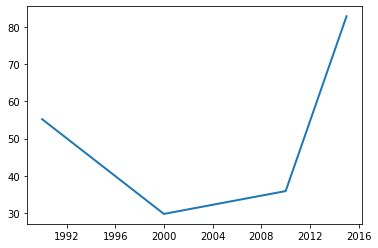

In [24]:
# plot
fig, ax = plt.subplots()

ax.plot(world['CH4'], linewidth=2.0)


plt.show()


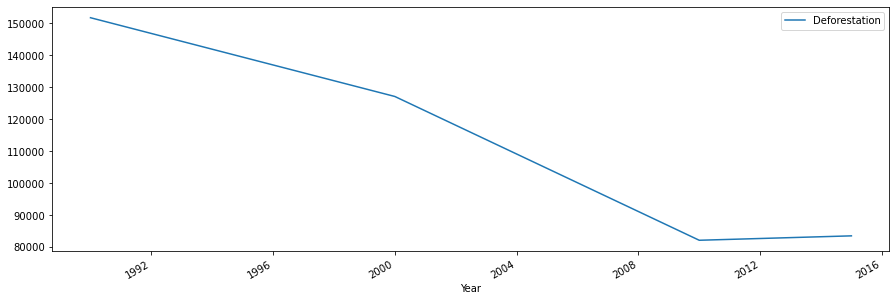

In [25]:
world.plot(y="Deforestation", figsize=(15,5))
plt.savefig("graph/Deforestation.png")

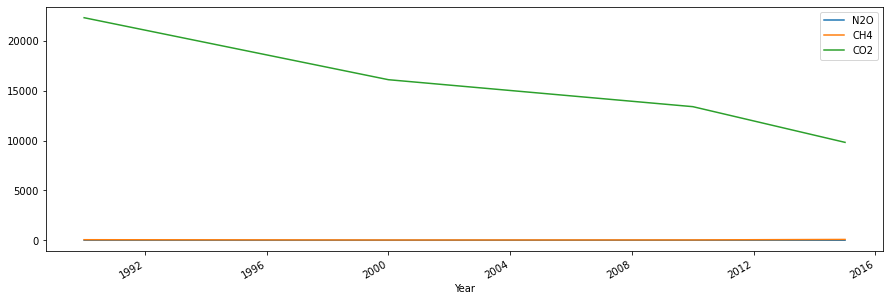

In [26]:
world.plot(y=["N2O", "CH4", "CO2"], figsize=(15,5))
plt.savefig("graph/Deforestation.png")

In [27]:
brazil = df[df['Country']=='Brazil']
#brazil=brazil.set_index('Year')
brazil_temp_mean=brazil['Deforestation'].mean()
brazil

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
42,1990-01-01,Brazil,4254800.00,kilotonnes,222.14,1038468.19,14.50,0.44
43,2000-01-01,Brazil,5129300.00,kilotonnes,87.01,1038487.71,2.58,0.55
44,2010-01-01,Brazil,1867800.00,kilotonnes,326.58,1101118.52,29.82,1.11
45,2015-01-01,Brazil,1695700.00,kilotonnes,183.88,261986.42,16.79,1.60


<ipython-input-28-c2ffb793af9c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()
<ipython-input-28-c2ffb793af9c>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


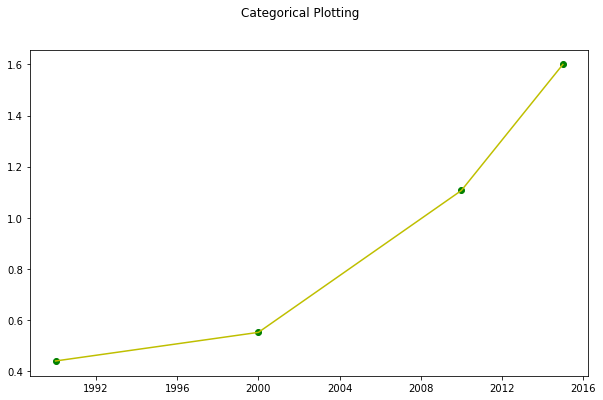

In [28]:
plt.figure(figsize=(10, 6))

plt.subplot()
brazil=brazil.reset_index()

#plt.bar(brazil.Country, brazil.Temperature_change)
plt.subplot()
plt.scatter(brazil.Year, brazil.Temperature_change, c='g')
plt.subplot()
plt.plot(brazil.Year, brazil.Temperature_change, c='y')
plt.suptitle('Categorical Plotting')
plt.show()

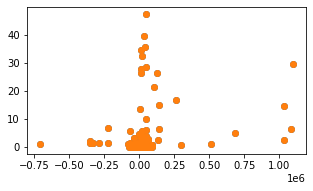

In [29]:
fig, ax = plt.subplots(figsize=(5, 2.7))
gaz =['CO2','N2O', 'CH4']

colors = {'CO2':'red', 'N2O':'green', 'CH4':'blue'}


ax.scatter(df.CO2, df.N2O,label=colors)
ax.scatter(df.CO2, df.N2O);

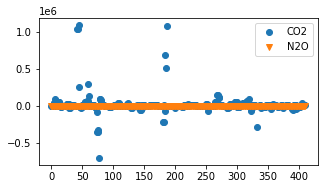

In [30]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(df.CO2, 'o', label='CO2')
#ax.plot(df.Deforestation, 'd', label='Deforestation')
ax.plot(df.N2O, 'v', label='N2O')
#ax.plot(df.CH4, 's', label='CH4')
#ax.plot(df.Temperature_change, 'p', label='Temperature')

ax.legend();

In [31]:
data = df.pivot_table(index=['Year'],columns='Country')
data

CH4                                                       \
Country    Algeria Argentina Aruba Australia Austria Azerbaijan Bahrain   
Year                                                                      
1990-01-01    1.76     26.66 39.38     89.67    0.01        NaN   39.38   
2000-01-01    9.63     63.61 39.38     88.09    0.00        NaN   39.38   
2010-01-01    0.18      7.53 39.38     10.38   39.38       0.09   39.38   
2015-01-01    0.07      4.65 39.38       NaN   39.38       0.01   39.38   

                                       ... Temperature_change                  \
Country    Bangladesh Belarus Belgium  ...               Togo Tokelau Tunisia   
Year                                   ...                                      
1990-01-01       1.98     NaN     NaN  ...               0.64    0.53    1.47   
2000-01-01       2.05    0.51     NaN  ...               0.54    0.49    1.07   
2010-01-01       0.49    0.10   39.38  ...               1.32    0.49    1.79   
2015-01-01       0.61    0.39   39.38  ...               1.20    0.49    1.17   

                                                                     
Country    Turkey Uganda Ukraine Uruguay Uzbekistan Zambia Zimbabwe  
Year                                                                 
1990-01-01  -0.07   0.33     NaN     NaN        NaN    NaN     0.52  
2000-01-01   0.52   0.41    1.42    0.40       1.39   0.11    -0.29  
2010-01-01   2.34   1.23    1.66    0.34       1.78   1.45     1.07  
2015-01-01   0.81   0.98    2.08     NaN       1.39   1.86     1.23  

[4 rows x 570 columns]

In [32]:
bra = df[df['Country']=='Brazil']
gree = df[df['Country']=='Greenland']
nor = df[df['Country']=='Norway']
zim = df[df['Country']=='Zimbabwe']
can = df[df['Country']=='Canada']
indo = df[df['Country']=='Indonesia']
moz = df[df['Country']=='Mozambique']

In [33]:
worst_temp = df.sort_values('Temperature_change', ascending=False).head(5)
worst_temp

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
153,2010-01-01,Greenland,91337.05,kilotonnes,39.38,-0.02,1.40,3.04
60,2010-01-01,Canada,41300.00,kilotonnes,7.35,301250.49,0.67,2.92
206,2010-01-01,Kuwait,91337.05,kilotonnes,39.38,-23.00,1.40,2.55
189,2010-01-01,Iraq,91337.05,kilotonnes,39.38,-51.70,1.40,2.54
24,2015-01-01,Bahrain,91337.05,kilotonnes,39.38,-2.89,1.40,2.35


<ipython-input-34-76792b1e54c7>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


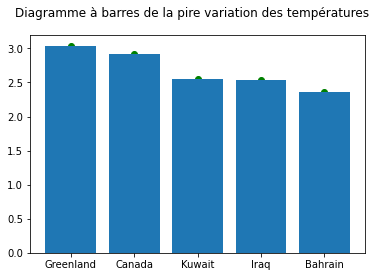

In [34]:
plt.figure()

plt.subplot()
plt.bar(worst_temp.Country, worst_temp.Temperature_change)
plt.subplot()
plt.scatter(worst_temp.Country, worst_temp.Temperature_change, c='g')
#plt.subplot()
#plt.plot(worst_temp.Country, worst_temp.Temperature_change, c='y')
plt.suptitle('Diagramme à barres de la pire variation des températures')
plt.savefig('graph/bar chart variation de la température.png')

plt.show()

In [35]:
best_temp=df.sort_values('Temperature_change', ascending=True).head(6)
best_temp

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
272,1990-01-01,Nauru,91337.05,kilotonnes,39.38,14117.20,1.40,-0.41
151,1990-01-01,Greenland,91337.05,kilotonnes,39.38,-0.14,1.40,-0.38
302,2010-01-01,Norway,5980.00,kilotonnes,39.38,-22809.50,1.40,-0.33
407,2000-01-01,Zimbabwe,46070.00,kilotonnes,0.55,10401.52,0.02,-0.29
71,2000-01-01,Chile,14210.00,kilotonnes,2.35,-17358.75,0.13,-0.28
365,2010-01-01,Sweden,38150.00,kilotonnes,39.38,-10984.07,1.40,-0.26


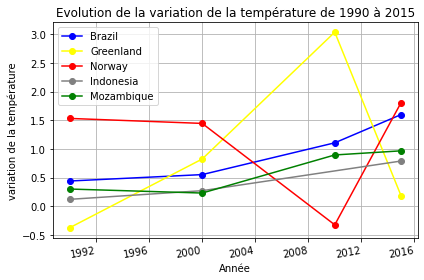

In [36]:
pays = ['Brazil', 'Greenland', 'Norway', "Indonesia", "Mozambique"]
colors = ['blue','yellow','red','grey','green']
# Paramètre généraux
fig, ax = plt.subplots()

# Paramètres des courbes

line1, = ax.plot(bra.Year, bra.Temperature_change,marker="o",
                color='blue')

line2, = ax.plot(gree.Year,gree.Temperature_change, marker="o",
                color='yellow')

line3, = ax.plot(nor.Year,nor.Temperature_change, marker="o",
                color='red')

line4, = ax.plot(indo.Year,indo.Temperature_change, marker="o",
                color='grey')

line5, = ax.plot(moz.Year,moz.Temperature_change, marker="o",
                color='green')


# Métadonnées
plt.title('Evolution de la variation de la température de 1990 à 2015', fontsize=12)
plt.xlabel('Année', fontsize=10)
plt.xticks(rotation=10, horizontalalignment='right')
plt.ylabel('variation de la température', fontsize = 10)
plt.legend(pays)
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig('graph/variation de la température.png')
plt.show()

In [37]:

pays_temp = df[df['Country'].isin(['Sweden', 'Greenland', 'Norway', 'Zimbabwe', 'Chile'])]
pays_temp

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
70,1990-01-01,Chile,10110.00,kilotonnes,3.78,-17363.90,0.31,0.16
71,2000-01-01,Chile,14210.00,kilotonnes,2.35,-17358.75,0.13,-0.28
72,2010-01-01,Chile,11270.00,kilotonnes,1.22,-36089.05,0.11,-0.12
73,2015-01-01,Chile,9400.00,kilotonnes,10.41,-81350.76,0.95,0.73
151,1990-01-01,Greenland,91337.05,kilotonnes,39.38,-0.14,1.40,-0.38
152,2000-01-01,Greenland,91337.05,kilotonnes,39.38,-0.14,1.40,0.82
153,2010-01-01,Greenland,91337.05,kilotonnes,39.38,-0.02,1.40,3.04
154,2015-01-01,Greenland,91337.05,kilotonnes,39.38,-0.10,1.40,0.18
300,1990-01-01,Norway,4920.00,kilotonnes,0.06,-15045.03,0.00,1.53
301,2000-01-01,Norway,6500.00,kilotonnes,0.06,-15062.89,0.00,1.45


In [38]:
best_defor=df.sort_values('Deforestation', ascending=True).head(5)
best_defor

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
21,1990-01-01,Bahrain,10.00,kilotonnes,39.38,-1.86,1.40,0.38
242,1990-01-01,Mauritius,10.00,kilotonnes,0.00,-22.94,0.00,0.36
22,2000-01-01,Bahrain,10.00,kilotonnes,39.38,-1.86,1.40,1.15
331,2015-01-01,Romania,20.00,kilotonnes,39.38,-285120.30,1.40,1.85
63,2000-01-01,Cayman Islands,20.00,kilotonnes,39.38,4.55,1.40,0.49


In [39]:
worst_defor = df.sort_values('Deforestation', ascending=False).head(5)
worst_defor

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
43,2000-01-01,Brazil,5129300.00,kilotonnes,87.01,1038487.71,2.58,0.55
42,1990-01-01,Brazil,4254800.00,kilotonnes,222.14,1038468.19,14.50,0.44
184,1990-01-01,Indonesia,2526000.00,kilotonnes,2590.61,684395.58,4.93,0.12
44,2010-01-01,Brazil,1867800.00,kilotonnes,326.58,1101118.52,29.82,1.11
45,2015-01-01,Brazil,1695700.00,kilotonnes,183.88,261986.42,16.79,1.60


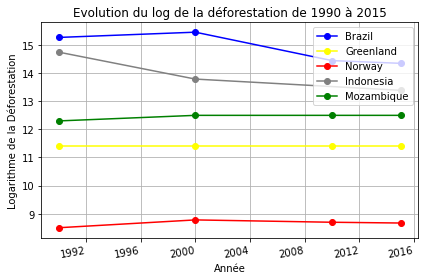

In [40]:
pays = ['Brazil', 'Greenland', 'Norway', "Indonesia", "Mozambique"]
colors = ['blue','yellow','red','grey','green']
# Paramètre généraux
fig, ax = plt.subplots()

# Paramètres des courbes

line1, = ax.plot(bra.Year, np.log(bra.Deforestation),marker="o",
                color='blue')

line2, = ax.plot(gree.Year,np.log(gree.Deforestation), marker="o",
                color='yellow')

line3, = ax.plot(nor.Year,np.log(nor.Deforestation), marker="o",
                color='red')

line4, = ax.plot(indo.Year,np.log(indo.Deforestation), marker="o",
                color='grey')

line5, = ax.plot(moz.Year,np.log(moz.Deforestation), marker="o",
                color='green')


# Métadonnées
plt.title('Evolution du log de la déforestation de 1990 à 2015', fontsize=12)
plt.xlabel('Année', fontsize=10)
plt.xticks(rotation=10, horizontalalignment='right')
plt.ylabel('Logarithme de la Déforestation', fontsize = 10)
plt.legend(pays, loc = 'upper right')
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig('graph/Déforestation.png')
plt.show()

In [41]:
df.sort_values('CH4', ascending=True).head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
280,1990-01-01,Netherlands,1140.00,kilotonnes,0.00,1475.32,1.40,1.57
195,1990-01-01,Isle of Man,91337.05,kilotonnes,0.00,1.60,1.40,0.88
341,2000-01-01,Singapore,140.00,kilotonnes,0.00,-49.91,1.40,0.59
196,2000-01-01,Isle of Man,91337.05,kilotonnes,0.00,1.58,1.40,0.62
242,1990-01-01,Mauritius,10.00,kilotonnes,0.00,-22.94,0.00,0.36


In [42]:
df.sort_values('CH4', ascending=False).head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
186,2015-01-01,Indonesia,650000.00,kilotonnes,5295.79,1083923.70,6.44,0.79
184,1990-01-01,Indonesia,2526000.00,kilotonnes,2590.61,684395.58,4.93,0.12
266,2010-01-01,Mozambique,267030.00,kilotonnes,521.13,48927.67,47.58,0.90
405,2015-01-01,Zambia,189710.00,kilotonnes,433.64,32840.42,39.59,1.86
267,2015-01-01,Mozambique,267030.00,kilotonnes,390.79,45580.68,35.68,0.97


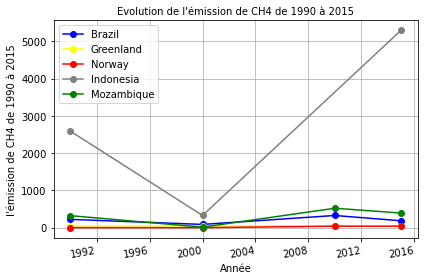

In [43]:
pays = ['Brazil', 'Greenland', 'Norway', "Indonesia", "Mozambique"]
colors = ['blue','yellow','red','grey','green']
# Paramètre généraux
fig, ax = plt.subplots()

# Paramètres des courbes

line1, = ax.plot(bra.Year, bra.CH4,marker="o",
                color='blue')

line2, = ax.plot(gree.Year,gree.CH4, marker="o",
                color='yellow')

line3, = ax.plot(nor.Year,nor.CH4, marker="o",
                color='red')

line4, = ax.plot(indo.Year,indo.CH4, marker="o",
                color='grey')

line5, = ax.plot(moz.Year,moz.CH4, marker="o",
                color='green')


# Métadonnées
plt.title("Evolution de l'émission de CH4 de 1990 à 2015", fontsize=10)
plt.xlabel('Année', fontsize=10)
plt.xticks(rotation=10, horizontalalignment='right')
plt.ylabel("l'émission de CH4 de 1990 à 2015", fontsize = 10)
plt.legend(pays)
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig("graph/l'émission de CH4 de 1990 à 2015.png")
plt.show()

In [44]:
df.sort_values(by=['N2O'], ascending=False).head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
266,2010-01-01,Mozambique,267030.00,kilotonnes,521.13,48927.67,47.58,0.90
405,2015-01-01,Zambia,189710.00,kilotonnes,433.64,32840.42,39.59,1.86
267,2015-01-01,Mozambique,267030.00,kilotonnes,390.79,45580.68,35.68,0.97
68,2010-01-01,Central African Republic,30000.00,kilotonnes,379.40,13967.33,34.64,1.30
404,2010-01-01,Zambia,189680.00,kilotonnes,355.89,17443.14,32.49,1.45


In [45]:
df.sort_values(by=['N2O'], ascending=True).head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
144,2000-01-01,Germany,5830.00,kilotonnes,0.00,-51107.43,0.00,1.76
242,1990-01-01,Mauritius,10.00,kilotonnes,0.00,-22.94,0.00,0.36
218,2000-01-01,Lithuania,140.00,kilotonnes,0.00,609.41,0.00,2.03
246,1990-01-01,Mayotte,370.00,kilotonnes,0.00,64.11,0.00,0.09
238,1990-01-01,Mauritania,37720.00,kilotonnes,0.00,398.12,0.00,1.45


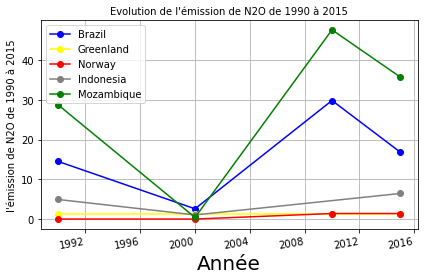

In [46]:
pays = ['Brazil', 'Greenland', 'Norway', "Indonesia", "Mozambique"]
colors = ['blue','yellow','red','grey','green']
# Paramètre généraux
fig, ax = plt.subplots()

# Paramètres des courbes

line1, = ax.plot(bra.Year, bra.N2O,marker="o",
                color='blue')

line2, = ax.plot(gree.Year,gree.N2O, marker="o",
                color='yellow')

line3, = ax.plot(nor.Year,nor.N2O, marker="o",
                color='red')

line4, = ax.plot(indo.Year,indo.N2O, marker="o",
                color='grey')

line5, = ax.plot(moz.Year,moz.N2O, marker="o",
                color='green')


# Métadonnées
plt.title("Evolution de l'émission de N2O de 1990 à 2015", fontsize=10)
plt.xlabel('Année', fontsize=20)
plt.xticks(rotation=10, horizontalalignment='right')
plt.ylabel("l'émission de N2O de 1990 à 2015", fontsize = 10)
plt.legend(pays)
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig("graph/l'émission de N2O de 1990 à 2015.png")
plt.show()

In [47]:
df.sort_values(by=['CO2'], ascending=False).head(5)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
44,2010-01-01,Brazil,1867800.00,kilotonnes,326.58,1101118.52,29.82,1.11
186,2015-01-01,Indonesia,650000.00,kilotonnes,5295.79,1083923.70,6.44,0.79
43,2000-01-01,Brazil,5129300.00,kilotonnes,87.01,1038487.71,2.58,0.55
42,1990-01-01,Brazil,4254800.00,kilotonnes,222.14,1038468.19,14.50,0.44
184,1990-01-01,Indonesia,2526000.00,kilotonnes,2590.61,684395.58,4.93,0.12


In [48]:
df.sort_values(by=['CO2'], ascending=True).head(10)

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
77,2015-01-01,China,133200.00,kilotonnes,10.63,-710167.28,0.97,1.34
74,1990-01-01,China,327540.00,kilotonnes,17.80,-349406.71,1.34,0.86
75,2000-01-01,China,312760.00,kilotonnes,39.53,-349354.22,2.14,0.58
76,2010-01-01,China,329970.00,kilotonnes,14.80,-332225.60,1.35,0.98
331,2015-01-01,Romania,20.00,kilotonnes,39.38,-285120.30,1.40,1.85
180,1990-01-01,India,384000.00,kilotonnes,83.89,-221166.09,6.95,-0.07
181,2000-01-01,India,629500.00,kilotonnes,51.39,-221100.98,1.53,0.34
73,2015-01-01,Chile,9400.00,kilotonnes,10.41,-81350.76,0.95,0.73
322,2010-01-01,Poland,620.00,kilotonnes,0.01,-71619.90,0.00,0.40
252,2010-01-01,Mexico,211610.00,kilotonnes,15.29,-66730.81,1.40,0.24


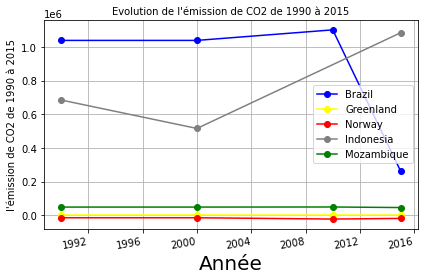

In [49]:
pays = ['Brazil', 'Greenland', 'Norway', "Indonesia", "Mozambique"]
colors = ['blue','yellow','red','grey','green']
# Paramètre généraux
fig, ax = plt.subplots()

# Paramètres des courbes

line1, = ax.plot(bra.Year, bra.CO2,marker="o",
                color='blue')

line2, = ax.plot(gree.Year,gree.CO2, marker="o",
                color='yellow')

line3, = ax.plot(nor.Year,nor.CO2, marker="o",
                color='red')

line4, = ax.plot(indo.Year,indo.CO2, marker="o",
                color='grey')

line5, = ax.plot(moz.Year,moz.CO2, marker="o",
                color='green')


# Métadonnées
plt.title("Evolution de l'émission de CO2 de 1990 à 2015", fontsize=10)
plt.xlabel('Année', fontsize=20)
plt.xticks(rotation=10, horizontalalignment='right')
plt.ylabel("l'émission de CO2 de 1990 à 2015", fontsize = 10)
plt.legend(pays)
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig("graph/l'émission de CO2 de 1990 à 2015.png")
plt.show()

In [50]:
df.describe()

,Deforestation,CH4,CO2,N2O,Temperature_change
count,410.00,410.00,410.00,410.00,410.00
mean,109158.91,50.72,15115.74,1.82,0.93
std,384321.26,296.58,127730.91,5.43,0.64
min,10.00,0.00,-710167.28,0.00,-0.41
25%,3155.00,0.22,-1804.49,0.02,0.44
50%,27780.00,6.90,1081.08,0.52,0.88
75%,91337.05,39.38,14117.20,1.40,1.34
max,5129300.00,5295.79,1101118.52,47.58,3.04


In [51]:
df.describe(datetime_is_numeric=True)

,Year,Deforestation,CH4,CO2,N2O,Temperature_change
count,410,410.00,410.00,410.00,410.00,410.00
mean,2004-05-13 22:28:40.975609728,109158.91,50.72,15115.74,1.82,0.93
min,1990-01-01 00:00:00,10.00,0.00,-710167.28,0.00,-0.41
25%,2000-01-01 00:00:00,3155.00,0.22,-1804.49,0.02,0.44
50%,2010-01-01 00:00:00,27780.00,6.90,1081.08,0.52,0.88
75%,2015-01-01 00:00:00,91337.05,39.38,14117.20,1.40,1.34
max,2015-01-01 00:00:00,5129300.00,5295.79,1101118.52,47.58,3.04
std,NaN,384321.26,296.58,127730.91,5.43,0.64


In [52]:
df.describe(datetime_is_numeric=True, include='all')

,Year,Country,Deforestation,Unit,CH4,CO2,N2O,Temperature_change
count,410,410,410.00,410,410.00,410.00,410.00,410.00
unique,NaN,114,NaN,1,NaN,NaN,NaN,NaN
top,NaN,Cuba,NaN,kilotonnes,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,410,NaN,NaN,NaN,NaN
mean,2004-05-13 22:28:40.975609728,NaN,109158.91,NaN,50.72,15115.74,1.82,0.93
min,1990-01-01 00:00:00,NaN,10.00,NaN,0.00,-710167.28,0.00,-0.41
25%,2000-01-01 00:00:00,NaN,3155.00,NaN,0.22,-1804.49,0.02,0.44
50%,2010-01-01 00:00:00,NaN,27780.00,NaN,6.90,1081.08,0.52,0.88
75%,2015-01-01 00:00:00,NaN,91337.05,NaN,39.38,14117.20,1.40,1.34
max,2015-01-01 00:00:00,NaN,5129300.00,NaN,5295.79,1101118.52,47.58,3.04


# Construisez un dendrogramme contenant l'ensemble des pays étudiés.

In [53]:
df1 = df.groupby(by='Country').mean()
df1

,Deforestation,CH4,CO2,N2O,Temperature_change
Country,,,,,
Algeria,9025.00,2.91,-470.83,0.17,1.40
Argentina,229550.00,25.61,62261.59,1.11,0.28
Aruba,91337.05,39.38,-0.04,1.40,0.70
Australia,558446.67,62.71,43383.50,3.60,0.42
Austria,5712.50,19.70,-10044.28,0.70,1.48
...,...,...,...,...,...
Ukraine,510.00,2.66,-29181.15,0.24,1.72
Uruguay,1245.00,0.30,-11602.44,0.02,0.37
Uzbekistan,6730.00,26.74,-5174.20,0.96,1.52


In [54]:
# préparation des données pour le clustering
data = df1[['Deforestation', 'Temperature_change', 'CH4', 'N2O', 'CO2']]
#data.set_index('Country', inplace=True)
X1 = data.values

data

,Deforestation,Temperature_change,CH4,N2O,CO2
Country,,,,,
Algeria,9025.00,1.40,2.91,0.17,-470.83
Argentina,229550.00,0.28,25.61,1.11,62261.59
Aruba,91337.05,0.70,39.38,1.40,-0.04
Australia,558446.67,0.42,62.71,3.60,43383.50
Austria,5712.50,1.48,19.70,0.70,-10044.28
...,...,...,...,...,...
Ukraine,510.00,1.72,2.66,0.24,-29181.15
Uruguay,1245.00,0.37,0.30,0.02,-11602.44
Uzbekistan,6730.00,1.52,26.74,0.96,-5174.20


In [55]:
import os
os.makedirs('graph', exist_ok=True)

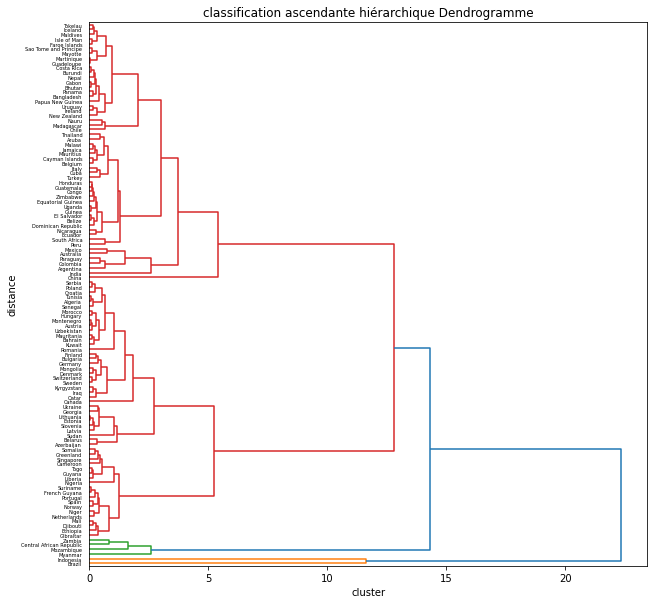

In [56]:
# conversion des nombres entiers en nombres décimaux (float) : necessaire pour le StandardScaler
X1 = X1.astype(np.float64)
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X1_scaled = std_scale.transform(X1)

# Clustering hiérarchique
Z1 = linkage(X1_scaled, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(10,10))
plt.title('classification ascendante hiérarchique Dendrogramme')
plt.ylabel('distance')
plt.xlabel('cluster')
 #treshhold justif

sch.dendrogram(Z1, labels = names, color_threshold=14, orientation='right')
# color_threshold permet de couper le dendrogramme en groupe à partir de la distance sélectionnée
#Affichage latéral gauche du dendrogramme avec l'option orientation
plt.savefig('graph/dendrogram.png')
plt.show()


In [57]:
#découpage à la hauteur t =6, on aura 4 groupes
groupes= fcluster(Z1,t=14,criterion='distance')
groupes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3], dtype=int32)

In [58]:
groupes = pd.DataFrame(groupes, columns=['cluster'], index=data.index)
groupes

,cluster
Country,
Algeria,3
Argentina,3
Aruba,3
Australia,3
Austria,3
...,...
Ukraine,3
Uruguay,3
Uzbekistan,3


In [84]:
# Concaténer selon les colonnes (axis=1) ou l'index(axis=0)
clusters = pd.concat([data, groupes], axis=1).reset_index()
clusters.head()

,Country,Deforestation,Temperature_change,CH4,N2O,CO2,cluster
0,Algeria,9025.00,1.40,2.91,0.17,-470.83,3
1,Argentina,229550.00,0.28,25.61,1.11,62261.59,3
2,Aruba,91337.05,0.70,39.38,1.40,-0.04,3
3,Australia,558446.67,0.42,62.71,3.60,43383.50,3
4,Austria,5712.50,1.48,19.70,0.70,-10044.28,3


# Caractérisation de chacun de ces groupes selon les variables citées

In [60]:
clusters_defor = clusters.groupby(by='cluster').describe()['Deforestation']
clusters_temp = clusters.groupby(by='cluster').describe()['Temperature_change']
clusters_CH4 = clusters.groupby(by='cluster').describe()['CH4']
clusters_N2O = clusters.groupby(by='cluster').describe()['N2O']
clusters_CO2 = clusters.groupby(by='cluster').describe()['CO2']

clusters_defor

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,2.00,2309283.33,1311848.07,1381666.67,1845475.00,2309283.33,2773091.67,3236900.00
2,4.00,193951.04,139920.36,30000.00,111410.00,196784.58,279325.62,352235.00
3,108.00,62883.15,101134.42,65.00,4825.00,26358.38,91337.05,587575.00


In [61]:
centroids = clusters.groupby(by='cluster').mean().reset_index()
centroids['Deforestation']=centroids['Deforestation'].astype('int64')
centroids['CH4']=centroids['CH4'].astype('int64')
centroids['N2O']=centroids['N2O'].astype('int64')
centroids['CO2']=centroids['CO2'].astype('int64')

centroids

,cluster,Deforestation,Temperature_change,CH4,N2O,CO2
0,1,2309283,0.66,1471,10,810636
1,2,193951,0.85,296,23,53471
2,3,62883,0.96,17,0,-1162


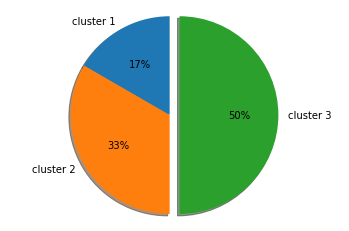

In [62]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 1', 'cluster 2', 'cluster 3'
explode = (0, 0, 0.1)  # only "explode" the 3rd slice

fig1, ax1 = plt.subplots()
ax1.pie(centroids.cluster, explode=explode, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('graph/pie.png')
plt.show()

[(0.0, 2.0),
 Text(0.5, 0, 'cluster'),
 Text(0, 0.5, 'Temperature Change'),
 Text(0.5, 1.0, 'Variation de Temperatures selon les clusters')]

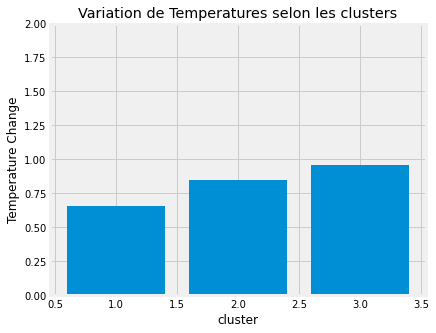

In [63]:
plt.style.use('fivethirtyeight')
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,5))
ax.bar(centroids.cluster, centroids.Temperature_change)
labels = ax.get_xticklabels()
ax.set(ylim=[0, 2], xlabel='cluster', ylabel='Temperature Change',
       title='Variation de Temperatures selon les clusters')

Text(0.5, 1.0, 'sous-groupes de clusters par Deforestation')

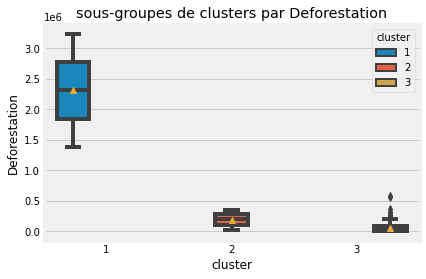

In [64]:
%matplotlib inline
#sns.set(rc={'figure.figsize':(13,10)})
bplt1 = sns.boxplot(x='cluster', y='Deforestation', data=clusters, showmeans=True, hue='cluster').set_title("sous-groupes de clusters par Deforestation")

# methode swarmplot nous permet de visualiser d'une meilleure façon la distribution des individus le long du boxplot
#sns.swarmplot(x='cluster', y='Deforestation',  data=clusters, color=".25")
plt.savefig('graph/cluster_Deforestation.png')
bplt1

Text(0.5, 1.0, 'sous-groupes de clusters par Temperature_change')

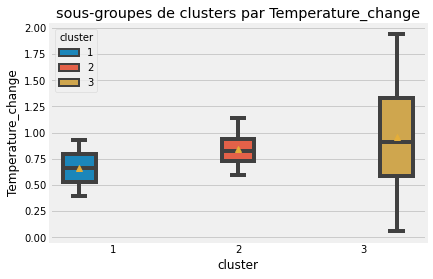

In [65]:
%matplotlib inline
#sns.set(rc={'figure.figsize':(13,10)})
bplt2 = sns.boxplot(x='cluster', y='Temperature_change', data=clusters, showmeans=True, hue='cluster').set_title("sous-groupes de clusters par Temperature_change")
plt.savefig('graph/cluster_Temperature_change.png')

# methode swarmplot nous permet de visualiser d'une meilleure façon la distribution des individus le long du boxplot
#sns.swarmplot(x='cluster', y='Deforestation',  data=clusters, color=".25")
bplt2

Text(0.5, 1.0, 'sous-groupes de clusters par emission de CH4_kg')

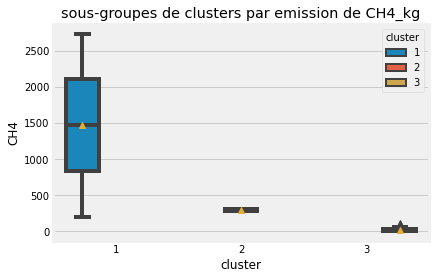

In [66]:
%matplotlib inline
#sns.set(rc={'figure.figsize':(13,10)})
bplt3 = sns.boxplot(x='cluster', y='CH4', data=clusters, showmeans=True, hue='cluster').set_title("sous-groupes de clusters par emission de CH4_kg")
plt.savefig('graph/cluster_CH4.png')

# methode swarmplot nous permet de visualiser d'une meilleure façon la distribution des individus le long du boxplot
#sns.swarmplot(x='cluster', y='Deforestation',  data=clusters, color=".25")
bplt3

Text(0.5, 1.0, 'sous-groupes de clusters par N2O')

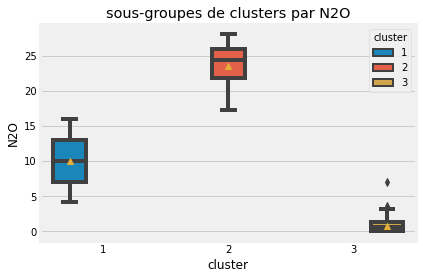

In [67]:
%matplotlib inline
#sns.set(rc={'figure.figsize':(13,10)})
bplt4 = sns.boxplot(x='cluster', y='N2O', data=clusters, showmeans=True, hue='cluster').set_title("sous-groupes de clusters par N2O")
plt.savefig('graph/cluster_N2O.png')

# methode swarmplot nous permet de visualiser d'une meilleure façon la distribution des individus le long du boxplot
#sns.swarmplot(x='cluster', y='Deforestation',  data=clusters, color=".25")
bplt4

Text(0.5, 1.0, 'sous-groupes de clusters par CO2')

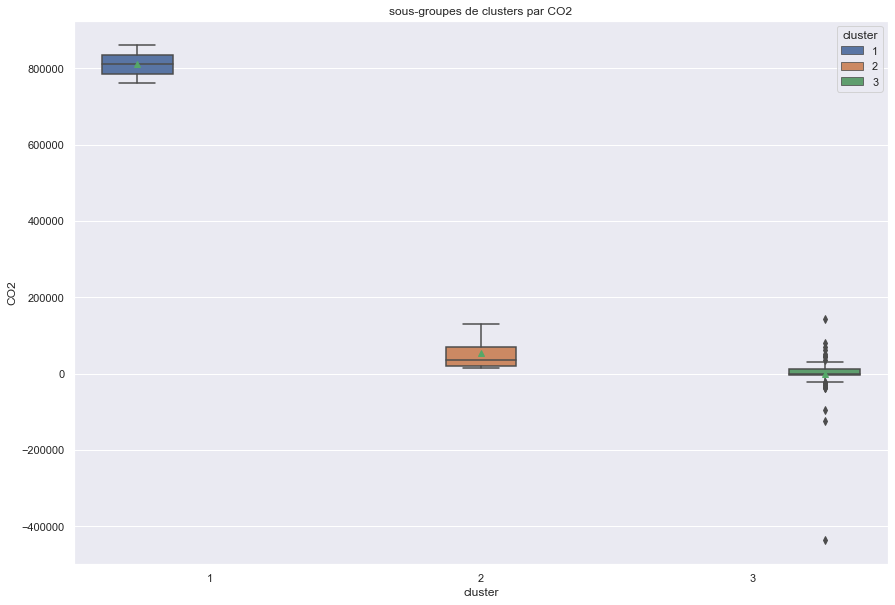

In [85]:
%matplotlib inline
sns.set(rc={'figure.figsize':(13,10)})
bplt5 = sns.boxplot(x='cluster', y='CO2', data=clusters, showmeans=True, hue='cluster').set_title("sous-groupes de clusters par CO2")
plt.savefig('graph/cluster_CO2.png')

# methode swarmplot nous permet de visualiser d'une meilleure façon la distribution des individus le long du boxplot
#sns.swarmplot(x='cluster', y='Deforestation',  data=clusters, color=".25")
bplt5

In [69]:
cluster_choisi = clusters[clusters.cluster==1]
cluster_choisi

,Country,Deforestation,Temperature_change,CH4,N2O,CO2,cluster
12,Brazil,3236900.00,0.92,204.90,15.92,860015.21,1
50,Indonesia,1381666.67,0.39,2737.84,4.14,761257.31,1


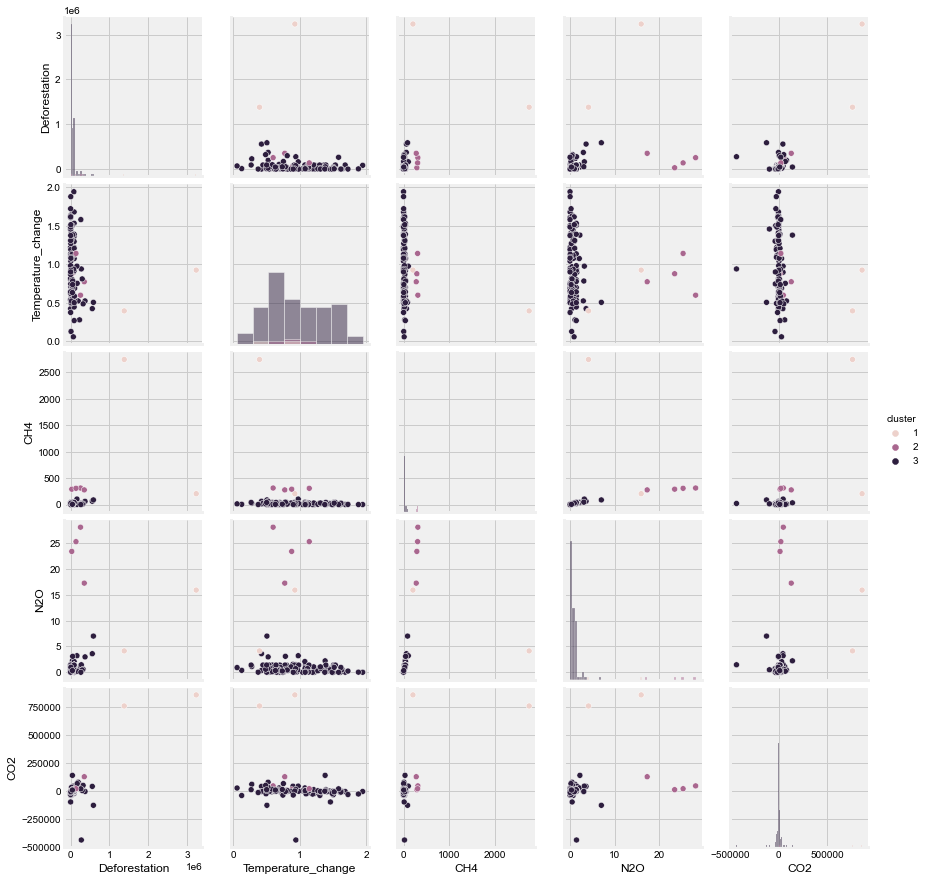

In [70]:
sns.pairplot(clusters, hue="cluster", diag_kind="hist")
sns.set(rc={'figure.figsize':(5,5)})

plt.savefig('graph/pairplot1.png')


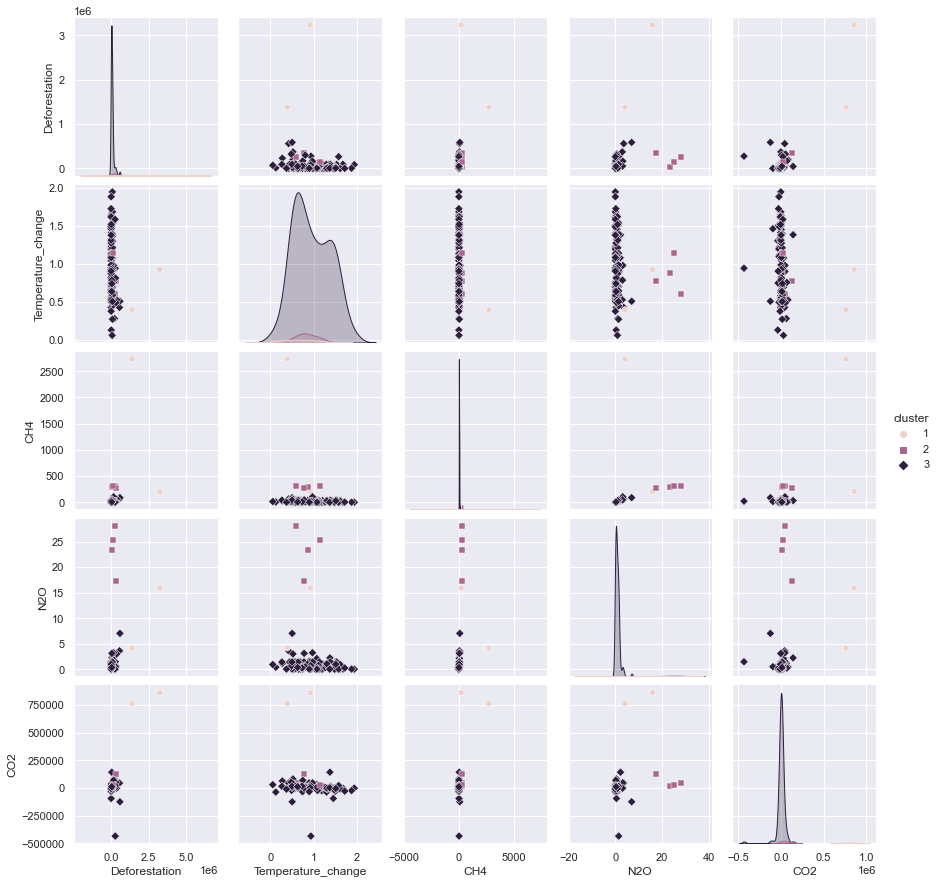

In [71]:
sns.pairplot(clusters, hue="cluster", markers=["o", "s", "D"])
plt.savefig('graph/pairplot2.png')


In [72]:
centroid_choisi = centroids[centroids.cluster==1]
centroid_choisi

,cluster,Deforestation,Temperature_change,CH4,N2O,CO2
0,1,2309283,0.66,1471,10,810636


In [73]:
#Visualisez vos partitions dans le premier plan factoriel obtenu par ACP.
#ACP sur le cluster choisi¶

In [74]:
# selection des colonnes du 1e clustering à prendre en compte dans l'acp'
data_acp = clusters[["Deforestation","Temperature_change", "CH4", 'N2O', 'CO2']]
data_cor = clusters[["Deforestation","Temperature_change", "CH4", 'N2O', 'CO2']]
#matrice des correlations
data_cor.corr()

,Deforestation,Temperature_change,CH4,N2O,CO2
Deforestation,1.00,-0.13,0.43,0.37,0.81
Temperature_change,-0.13,1.00,-0.14,-0.09,-0.12
CH4,0.43,-0.14,1.00,0.26,0.64
N2O,0.37,-0.09,0.26,1.00,0.29
CO2,0.81,-0.12,0.64,0.29,1.00


In [75]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster, centroid
from sklearn import preprocessing, decomposition
from functions import *
# choix du nombre de composantes à calculer

ensemble = [clusters.loc[cluster_id, "cluster"] for cluster_id in clusters.index]

# préparation des données pour l'ACP
X3 = data_acp.values
features = data_acp.columns
n_comp = len(features)

cluster_columns = clusters.groupby("cluster").mean()
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X3)
X3_scaled = std_scale.transform(X3)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X3_scaled)

PCA(n_components=5)

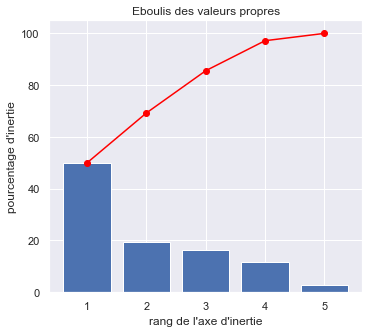

<Figure size 360x360 with 0 Axes>

In [76]:
display_scree_plot(pca)
plt.savefig('graph/eboulis.png')


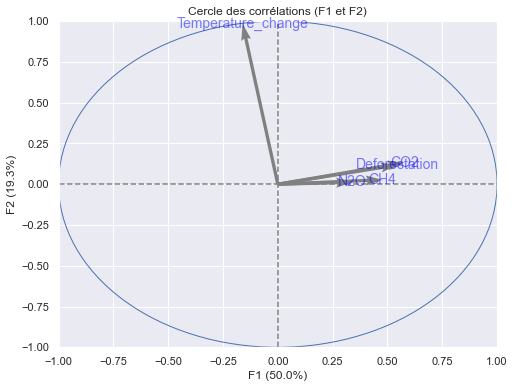

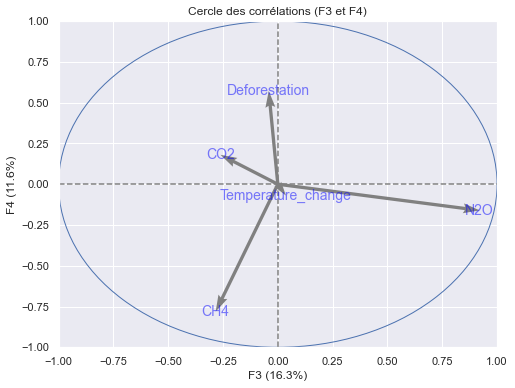

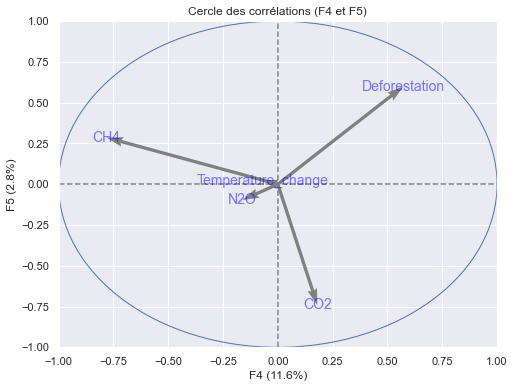

In [77]:
# Cercle des corrélations
pcs = pca.components_

display_circles(pcs, n_comp, pca, [(0,1),(2,3),(3,4)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(3,4)], labels = np.array(centroids.cluster))


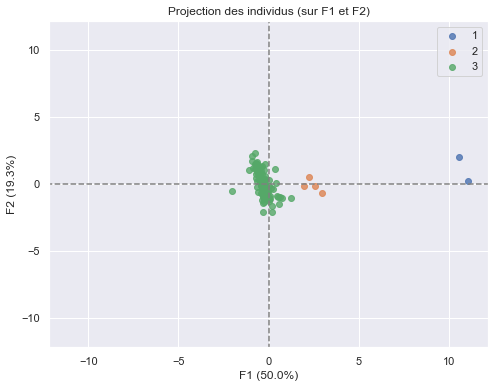

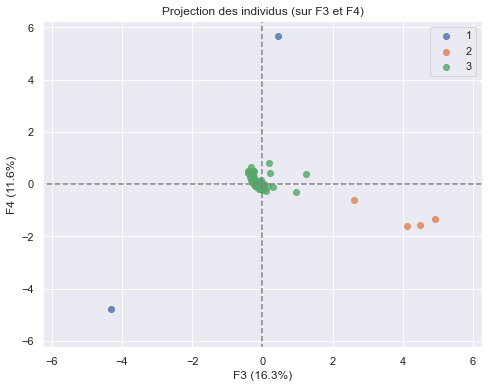

<Figure size 360x360 with 0 Axes>

In [78]:
# Projection des individus
X3_projected = pca.transform(X3_scaled)
display_factorial_planes(X3_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = ensemble, alpha = 0.8)
plt.savefig('graph/projection_individus_F1_F4.png')


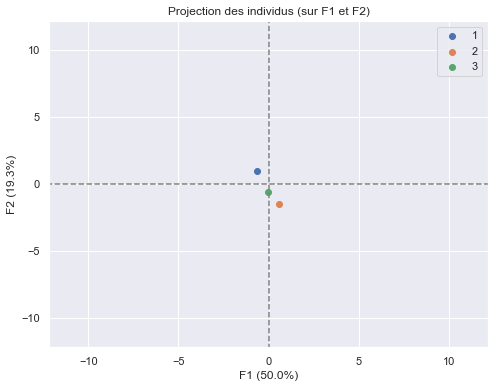

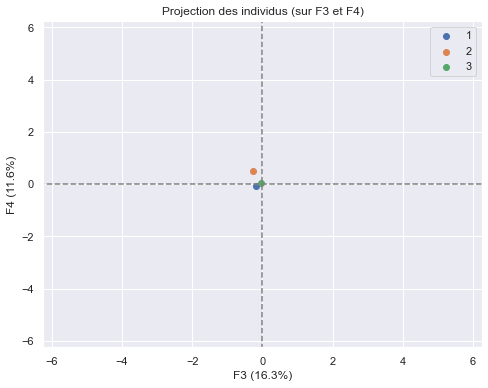

In [79]:
# Projection des individus
X3_projected = pca.transform(X3_scaled)

# Projection des clusters

display_factorial_planes(X3_projected, n_comp, pca, [(0,1),(2,3)],labels=None,alpha=1,illustrative_var=centroids.cluster)

plt.show()

In [80]:
pd.DataFrame(X3_scaled, columns=features, index=clusters.index)

,Deforestation,Temperature_change,CH4,N2O,CO2
0,-0.29,1.09,-0.19,-0.35,-0.13
1,0.37,-1.61,-0.11,-0.14,0.40
2,-0.05,-0.60,-0.05,-0.08,-0.13
3,1.35,-1.26,0.04,0.41,0.24
4,-0.30,1.28,-0.13,-0.23,-0.21
...,...,...,...,...,...
109,-0.32,1.86,-0.20,-0.33,-0.37
110,-0.32,-1.38,-0.20,-0.38,-0.23
111,-0.30,1.36,-0.10,-0.17,-0.17
112,0.09,0.46,0.98,5.17,0.06


In [81]:
n_comp_f = 2
X3_scaled = preprocessing.StandardScaler().fit_transform(data_acp.values)
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp_f)
X3_projected = pca.fit_transform(X3_scaled)
pd.DataFrame(X3_projected, index=clusters.index, columns=["F"+str(i+1) for i in range(n_comp_f)])

,F1,F2
0,-0.62,1.01
1,0.59,-1.49
2,-0.05,-0.62
3,1.23,-1.04
4,-0.63,1.19
...,...,...
109,-0.89,1.73
110,-0.31,-1.43
111,-0.59,1.27
112,2.25,0.56


In [82]:
f1 = pca.components_[0]
print(f1)

[ 0.54579331 -0.1605441   0.47692317  0.34133867  0.57651319]


In [83]:
X3_scaled = preprocessing.StandardScaler().fit_transform(centroids.values)
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp_f)
X3_projected = pca.fit_transform(X3_scaled)
centroids_dimensions = pd.DataFrame(X3_projected, index=centroids.cluster, columns=["F"+str(i+1) for i in range(n_comp_f)] )
centroids_dimensions

,F1,F2
cluster,,
1,3.00,-0.42
2,-0.75,1.46
3,-2.24,-1.05
